# Versuch 240
# Hysterese der Magnetisierung von Eise


## Durchführung
### 240.a
#### Man braucht zunächst die Eisenkern zu entmagnetisieren, um die Hysteresekurve (und die Neukurve) erhaltet zu werden. Dazu werden wir die beide Magnetspulen an einem Regeltrafo anschlißen.

#### Feage : Braucht man der Umschalter bei Entmagnetisierung?
#### Antwort : Den brauchen wir nicht, weil es duchr Regeltrafo einen Wechselstrom eingeführt wird und durch Erhöhug und langsam Redutzierung, den Eisenkern entmagnetisiert wird (Hysteresekurve).

### 240.b : B-Messung
#### Es wird mit hilfe von Cassy, der Strom und das B-Feld gemmesen. Dazu darf man bis zum 3A der Eingangsstrom erhöhen und die sättigung der Magnetfeld in der Eisenkern erhalten, und wieder bis zum 0A den Strom senken. Dann Umpolen und den verlauf wiederholen.

###240.c: Auswertung
#### Der Restmagnetisirund der Eisenkern bertägt etwa 8 mT. Und der fehler bei der gemesenen Feldstärke ist 3% .
#### Die Magnetische Erregung lässt sich durch die verwendete Formel berechnen. $$H= \frac{NI}{l_{Fe}}-\frac{d}{\mu_{0}l_{Fe}}.B$$
### Fehlerrechnung
#### $$\Delta H = \sqrt{(\frac{\Delta I.N}{l_{Fe}})^2+(\frac{\Delta d.B}{\mu_{0} . l_{Fe}})^2 + (\frac{\Delta B.d}{\mu_{0} .l_{Fe}})^2 +  (\frac{NI}{(l_{Fe})^2}-\frac{d.B}{(l_{Fe})^2})^2 }$$

#### wobei 
$$\mu_{0}= 4\pi.10^{-7} Vs/Am$$ $$l = (477.0 \pm 0.4)mm$$ $$d = (2.00 \pm 0.05 )mm $$ $$N= 2(500)=1000 windungen$$ $$ \Delta I=0$$ 

<Container object of 3 artists>

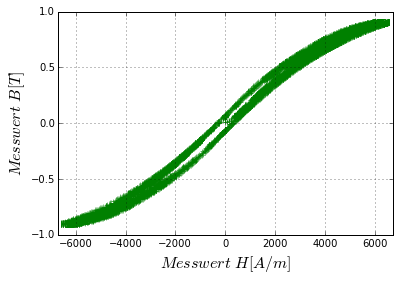

In [231]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

inputFilename = 'messung.txt'

data = np.loadtxt(inputFilename, comments='#')

Idata = data[:,1]
Bdata = data[:,2]


I = np.array(Idata)
B = np.array(Bdata*10**-3)

#print(B)
H =((I)*((1000)/0.477)-(B)*(0.002)/(4*np.pi*0.477*10**7))
m=4*np.pi*10**(-7)
deltaH =((0.00005*B/(m*0.477))**2+((B*3/100)*0.002/(m*0.477))**2+0.0004*(1000*I/0.477**2 - (0.002*B)/0.477**2)**2)**(0.5)
#print(deltaH)
sigmax = deltaH
sigmay = B*3/100

fig = plt.figure()
ax  = fig.add_subplot(111)

# Vielleicht wollen Sie noch etwas in den Plot schreiben, z.B. eine Formel?
#formulaText = '$\chi^2=\sum\\frac{(y_i-f(x_i,\\vec{a}))^2}{s_i^2}=3$' 
#ax.text(0.95, 0.05, formulaText, verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, fontsize=20)
plt.grid()
# Die Achsen brauchen auf jeden Fall eine Beschriftung
plt.ylabel('$Messwert$ $B [T]$', fontsize = 16)
plt.xlabel('$Messwert$ $H [A/m]$', fontsize = 16)
plt.xlim(H[0]-6700,H[-1]+500)

# Plotte die Daten als rote Punkte mit vertikalen Fehlerbalken
#plt.errorbar(H, B, sigma, fmt='b,')
plt.errorbar(H, B, sigmay , sigmax, fmt='g,')
# # Speichere den Plot
# plotname = '1.pdf'
# plt.savefig(plotname, bbox_inches=0, dpi=1080)
# plt.close()


## Rechnung der Maximal- und Anfangspermeabilität

### Für die Anfangspermeabilität nehme man die erste 10 Punkte und Zeichnet die Fit davon und für die Maximale Permeabilität habe ich per Hand gerechnet

<Container object of 3 artists>

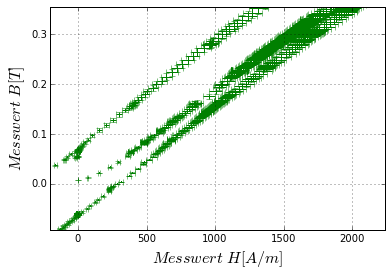

In [253]:
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.grid()
# Die Achsen brauchen auf jeden Fall eine Beschriftung
plt.ylabel('$Messwert$ $B [T]$', fontsize = 16)
plt.xlabel('$Messwert$ $H [A/m]$', fontsize = 16)
plt.xlim(H[0]-200,H[-1]-4000)
plt.ylim(B[0]-0.1,B[-1]-0.55)
# Plotte die Daten als rote Punkte mit vertikalen Fehlerbalken
#plt.errorbar(H, B, sigma, fmt='b,')
plt.errorbar(H, B, sigmay , sigmax, fmt='g,')
# # Speichere den Plot
# plotname = '2.pdf'
# plt.savefig(plotname, bbox_inches=0, dpi=1080)
# plt.close()


<Container object of 3 artists>

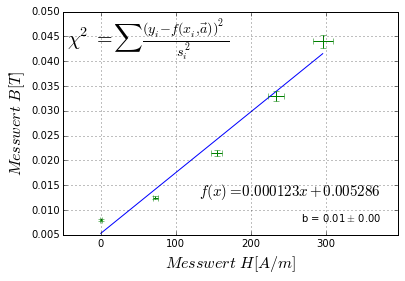

In [244]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

inputFilename = 'messungz.txt'

data = np.loadtxt(inputFilename, comments='#')

Idata = data[:,1]
Bdata = data[:,2]


I = np.array(Idata)
B = np.array(Bdata*10**-3)

#print(B)
H =((I)*((1000)/0.477)-(B)*(0.002)/(4*np.pi*0.477*10**7))
m=4*np.pi*10**(-7)
deltaH =((0.00005*B/(m*0.477))**2+((B*3/100)*0.002/(m*0.477))**2+0.0004*(1000*I/0.477**2 - (0.002*B)/0.477**2)**2)**(0.5)
#print(deltaH)
sigmax = deltaH
sigmay = B*3/100

fig = plt.figure()
ax  = fig.add_subplot(111)

##########################################

def f(x,a,b):
    return a*x + b

number_of_measurements = len(H) 
degrees_of_freedom     = number_of_measurements - 2


meanx         = H.mean()
meany         = B.mean()
sumxdata      = H.sum()
sumydata      = B.sum()
sumxdata2     = (H**2).sum()
sumxdataydata = (H*B).sum()

m=sumxdataydata/sumxdata2

slope     = (sumxdataydata-(1./number_of_measurements)*sumxdata*sumydata)/(sumxdata2-(1./number_of_measurements)*sumxdata**2)
intercept = meany - slope*meanx

predict_y  = intercept + slope * H
pred_error = B - predict_y
sigma_y    = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
slope_std_err     = sigma_y/np.sqrt(sumxdata2-(1./number_of_measurements)*sumxdata**2)
intercept_std_err = sigma_y*np.sqrt(((1./number_of_measurements)*sumxdata2)/(sumxdata2-(1./number_of_measurements)*sumxdata**2))

t = np.arange(min(H),max(H), 0.2)
#####################################


# Vielleicht wollen Sie noch etwas in den Plot schreiben, z.B. eine Formel?
formulaText = '$\chi^2=\sum\\frac{(y_i-f(x_i,\\vec{a}))^2}{s_i^2}$' 
ax.text(0.01,0.85, formulaText, verticalalignment='baseline', horizontalalignment='left', transform=ax.transAxes, fontsize=20)

formulaText1 = '$f(x)=%.6f x' % slope 
formulaText2 = '+ %.6f$' % intercept
formulaText  = formulaText1 + formulaText2
ax.text(0.95, 0.15, formulaText, verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, fontsize=15)
formulaText3 = '$a = %.2f' % slope
formulaText4 = '$\pm$ %.2f' % slope_std_err
formulaTextS = formulaText3 + formulaText4
formulaText5 = ' b = %.2f' % intercept
formulaText6 = '$\pm$ %.2f' % intercept_std_err
formulaTextI = formulaText5 + formulaText6
formulaTextErrors =  formulaTextI
ax.text(0.95, 0.05, formulaTextErrors, verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, fontsize=10)


plt.grid()
# Die Achsen brauchen auf jeden Fall eine Beschriftung
plt.ylabel('$Messwert$ $B [T]$', fontsize = 16)
plt.xlabel('$Messwert$ $H [A/m]$', fontsize = 16)
plt.xlim(H[0]-50,H[-1]+100)



# Plotte die Daten als rote Punkte mit vertikalen Fehlerbalken
#plt.errorbar(H, B, sigma, fmt='b,')
plt.plot(t,f(t,slope,intercept))
plt.errorbar(H, B, sigmay , sigmax, fmt='g,')
# # Speichere den Plot
# plotname = 'neukurve.pdf'
# plt.savefig(plotname, bbox_inches=0, dpi=1080)
# plt.close()
